# Lesson 1.5: Descriptive Statistics - EDA

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to introduce descriptive statistics to the students and conducting EDA (Exploratory Data Analysis) through visualizations using `Matplotlib` and `Seaborn`. Some other concepts including correlations along with their implementation and interpretation are also introduced. The students will also be able to build a simple linear regression model.

---

### Setup

To start this lesson, students should have:

- Completed lesson 1.4
- All previous Setup

### Learning Objectives

After this lesson, students will be able to:

- Explain the meaning and purpose of descriptive statistics.
- Perform Exploratory Data Analysis with `Matplotlib` and `Seaborn`.
- Work with continuous distributions (normal distribution).
- Use a correlation matrix to interpret numerical variables.
- Use multivariate linear regression to predicting a numerical target.

---

### Lesson 1 key concepts

> :clock10: 20 min

- Introduction to descriptive statistics
  - Briefly talk about descriptive statistics and inferential statistics
  - Measures of central tendency - _mean_, _median_, _mode_
  - Measures of spread/dispersion - SD, var, range, quartiles, percentiles
  - Frequency estimation - frequency
- `.describe()` function with Python
- Removing outliers

- The students can continue using the same Jupyter file which they would be working on in the previous lesson.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns # conda install -c anaconda seaborn
%matplotlib inline

In [2]:
data = pd.read_csv('./files_for_lesson_and_activities/merged_clean_ver2.csv')

In [3]:
data.describe()
# data.describe(include=[np.number])

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


In [4]:
data.describe(include=[np.object])

,state,gender
count,3993,3993
unique,52,10
top,CA,F
freq,751,2080


In [5]:
summary = data.describe().T

In [6]:
summary

,count,mean,std,min,25%,50%,75%,max
id,3993.0,98929.308039,58179.839090,12.00000,46153.0000,101432.0,151653.000000,191779.0
median_home_val,3993.0,1158.437751,1033.485773,0.00000,548.0000,803.0,1349.000000,5982.0
median_household_income,3993.0,351.622840,168.488445,0.00000,239.0000,318.0,425.000000,1500.0
ic2,3993.0,400.713248,180.568500,0.00000,284.0000,366.0,478.000000,1500.0
ic3,3993.0,399.876283,164.822741,0.00000,287.0000,365.0,480.000000,1311.0
ic4,3993.0,444.732031,175.004178,0.00000,325.0000,410.0,528.000000,1331.0
ic5,3993.0,16456.413724,9455.318118,0.00000,11136.0000,14356.0,18780.000000,174523.0
avggift,3993.0,11.785117,10.172672,2.26087,7.1875,10.0,14.428571,450.0
target_d,3993.0,15.665036,12.703041,1.00000,10.0000,14.0,20.000000,200.0


In [7]:
summary['iqr'] = summary['75%']-summary['25%']

In [8]:
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))

In [9]:
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,3993.0,98929.31,58179.839090,12.00000,46153.0000,101432.0,151653.000000,191779.0,105500.000000
median_home_val,3993.0,1158.44,1033.485773,0.00000,548.0000,803.0,1349.000000,5982.0,801.000000
median_household_income,3993.0,351.62,168.488445,0.00000,239.0000,318.0,425.000000,1500.0,186.000000
ic2,3993.0,400.71,180.568500,0.00000,284.0000,366.0,478.000000,1500.0,194.000000
ic3,3993.0,399.88,164.822741,0.00000,287.0000,365.0,480.000000,1311.0,193.000000
ic4,3993.0,444.73,175.004178,0.00000,325.0000,410.0,528.000000,1331.0,203.000000
ic5,3993.0,16456.41,9455.318118,0.00000,11136.0000,14356.0,18780.000000,174523.0,7644.000000
avggift,3993.0,11.79,10.172672,2.26087,7.1875,10.0,14.428571,450.0,7.241071
target_d,3993.0,15.67,12.703041,1.00000,10.0000,14.0,20.000000,200.0,10.000000


#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.05 Activity 1

Refer to the file `files_for_lesson_and_activities/merged_clean_ver1.csv` for this exercise.

1. Import the `merged_clean_ver1.csv` file.
2. Check the data types of all columns in the dataframe.
3. Use the describe method on only the float type columns.

### Debate

4. What is the difference between population mean and sample mean.

In [10]:
import numpy as np

In [11]:
# 1
df = pd.read_csv('./files_for_lesson_and_activities/merged_clean_ver1.csv')

In [12]:
# 2
df.dtypes

Unnamed: 0                   int64
id                           int64
state                       object
gender                      object
median_home_val            float64
median_household_income      int64
ic2                          int64
ic3                          int64
ic4                          int64
ic5                          int64
avggift                    float64
target_d                   float64
dtype: object

In [13]:
# 3
df.describe(include=[np.float])

,median_home_val,avggift,target_d
count,3993.000000,3993.000000,3993.000000
mean,1158.437751,11.785117,15.665036
std,1033.485773,10.172672,12.703041
min,0.000000,2.260870,1.000000
25%,548.000000,7.187500,10.000000
50%,803.000000,10.000000,14.000000
75%,1349.000000,14.428571,20.000000
max,5982.000000,450.000000,200.000000


4. For the last question, we'll discuss the difference between population and random samples in statistics. We need to understand the difference between population standard deviation and sample standard deviation. We'll use the math library to show the difference in results by using the methods on a list.

In [14]:
# 4
population = list(np.random.random(5000))
print(round(np.mean(population),2))

0.49


In [15]:
print("Population mean = ", round(np.mean(population),2))
print("Population standard deviation = ",round(np.std(population),2))

Population mean =  0.49
Population standard deviation =  0.29


In [16]:
for i in range(10):
    sample = list(np.random.choice(population, 400, replace = False))
    print("Sample ",i)
    print("----------")
    print("Sample mean = ", round(np.mean(sample),2))
    print("Sample standard deviation = ", round(np.std(sample, ddof=1),2))
    print()

Sample  0
----------
Sample mean =  0.49
Sample standard deviation =  0.28

Sample  1
----------
Sample mean =  0.49
Sample standard deviation =  0.28

Sample  2
----------
Sample mean =  0.49
Sample standard deviation =  0.29

Sample  3
----------
Sample mean =  0.5
Sample standard deviation =  0.29

Sample  4
----------
Sample mean =  0.49
Sample standard deviation =  0.29

Sample  5
----------
Sample mean =  0.49
Sample standard deviation =  0.27

Sample  6
----------
Sample mean =  0.51
Sample standard deviation =  0.3

Sample  7
----------
Sample mean =  0.5
Sample standard deviation =  0.29

Sample  8
----------
Sample mean =  0.48
Sample standard deviation =  0.28

Sample  9
----------
Sample mean =  0.5
Sample standard deviation =  0.28



### Lesson 2 key concepts

> :clock10: 20 min

- Exploratory data analysis using `Matplotlib` and `Seaborn` (Note for the instructor: Explain what they are, and why do we need them)
  - Histograms
  - Scatter plots
  - Box plots
  - Bar plots

In [17]:
# Exploratory data analysis using Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

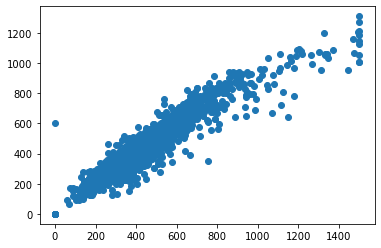

In [18]:
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

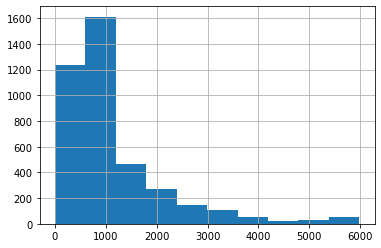

In [19]:
data['median_home_val'].hist()
plt.show()

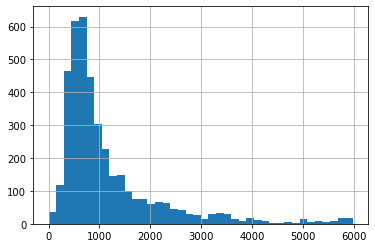

In [20]:
data['median_home_val'].hist(bins=40)
plt.show()

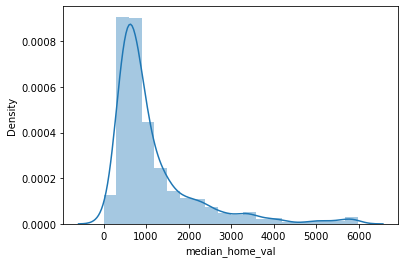

In [21]:
sns.distplot(data['median_home_val'], bins=20)
plt.show()

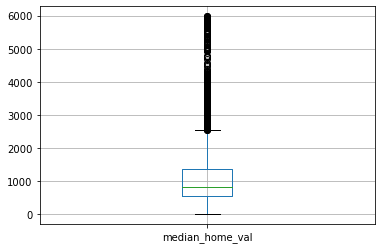

In [22]:
data[['median_home_val']].boxplot()
plt.show()

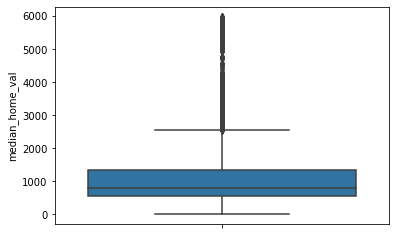

In [23]:
sns.boxplot(y="median_home_val", data=data)
plt.show()

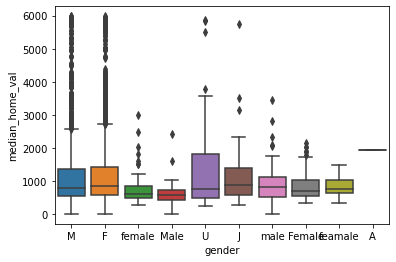

In [24]:
sns.boxplot(x = 'gender',y='median_home_val', data=data)
plt.show()

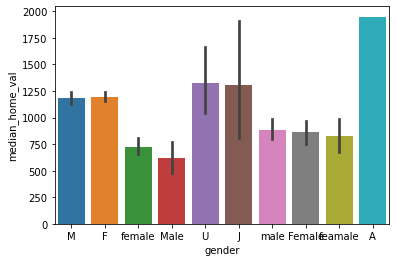

In [25]:
sns.barplot(x="gender", y="median_home_val", data=data)
plt.show()

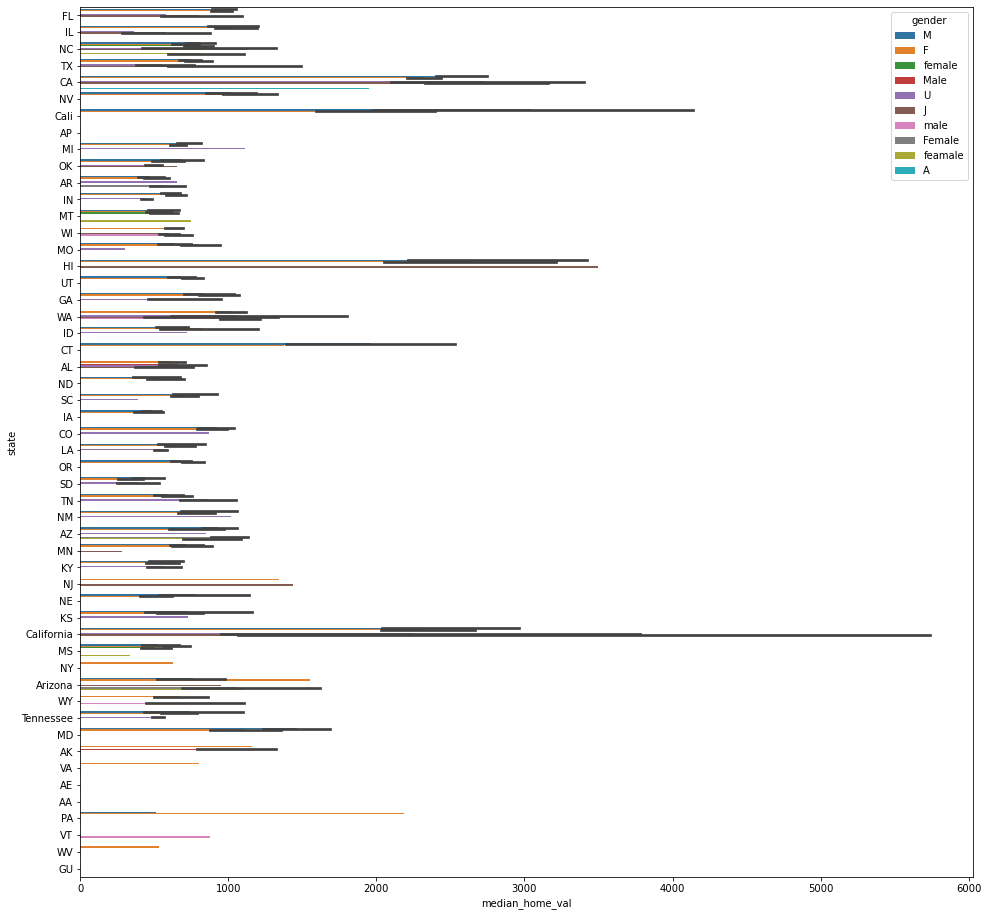

In [26]:
plt.figure(figsize=(16,16))
sns.barplot(y="state", x="median_home_val", hue= 'gender', data=data)
plt.show()

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.05 Activity 2

(_Keep working on the same file._)

1. Get the numeric data.
2. Use the `describe()` method on the numeric data in the DataFrame.
3. Print the median.
4. Print IQR.

In [27]:
#1
df._get_numeric_data()

,Unnamed: 0,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,0,44060,1158.437751,392,430,466,520,21975,28.000000,100.0
1,1,96093,537.000000,365,415,410,473,19387,5.666667,7.0
2,2,43333,725.000000,301,340,361,436,18837,4.111111,5.0
3,3,21885,1158.437751,401,407,399,413,14014,27.277778,38.0
4,4,190108,995.000000,252,280,316,348,17991,6.000000,5.0
...,...,...,...,...,...,...,...,...,...,...
3988,996,66762,632.000000,279,336,339,388,12653,8.533333,5.0
3989,997,6443,595.000000,252,263,262,274,11132,14.692308,20.0
3990,998,151175,2707.000000,507,504,538,537,16165,12.117647,22.0
3991,999,151504,2666.000000,535,609,612,653,24745,12.333333,21.0


In [28]:
#2
df.describe()

,Unnamed: 0,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,499.431255,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,288.332533,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,250.000000,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,499.000000,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,749.000000,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,1001.000000,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


In [29]:
#3
summary=df.describe().T
summary['50%']

Unnamed: 0                    499.0
id                         101432.0
median_home_val               803.0
median_household_income       318.0
ic2                           366.0
ic3                           365.0
ic4                           410.0
ic5                         14356.0
avggift                        10.0
target_d                       14.0
Name: 50%, dtype: float64

In [30]:
#4
summary['75%']-summary['25%']

Unnamed: 0                    499.000000
id                         105500.000000
median_home_val               801.000000
median_household_income       186.000000
ic2                           194.000000
ic3                           193.000000
ic4                           203.000000
ic5                          7644.000000
avggift                         7.241071
target_d                       10.000000
dtype: float64

### Lesson 3 key concepts

> :clock10: 20 min

- Covariance and correlation coefficients
  - Significance of correlation
  - Pearson correlation
  - Spearman correlation (Rank correlation)

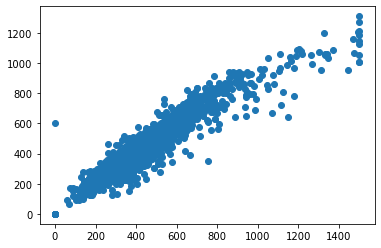

In [31]:
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

In [32]:
## Numerical Variables
import scipy.stats as stats

In [33]:
x=data['ic2']
y=data['ic3']

In [34]:
stats.pearsonr(x, y) # gives correlation coefficient and the p value

(0.9535853403294168, 0.0)

In [35]:
x.corr(y) # this is the pandas implementation of the correlation coefficient

0.9535853403294169

In [36]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9510617375454639, pvalue=0.0)

In [37]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.8254641303546064, pvalue=0.0)

#### :pencil2: Check for Understanding - Class activity/quick quiz

> :clock10: 10 min (+ 10 min Review)

# 1.05 Activity 3

Refer to the file `files_for_activities/merged_clean_ver2.csv` for this exercise.

1. Load data from the `merged_clean_ver2.csv` file.
2. Plot Pearson Correlation Heatmap.
3. Plot Spearman Correlation Heatmap.
4. Plot Kendall Correlation Heatmap.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv('./files_for_lesson_and_activities/merged_clean_ver2.csv')

In [40]:
# Pearson
corr_matrix=data.corr(method='pearson')  # default

In [41]:
mask = np.zeros_like(corr_matrix)

In [42]:
mask[np.triu_indices_from(mask)] = True

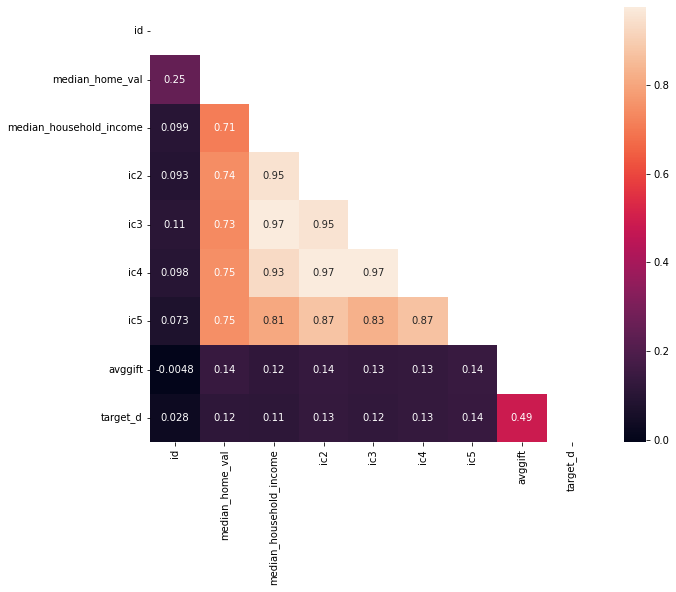

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [44]:
# Spearman
corr_matrix=data.corr(method='spearman')

In [45]:
mask = np.zeros_like(corr_matrix)         

In [46]:
mask[np.triu_indices_from(mask)] = True

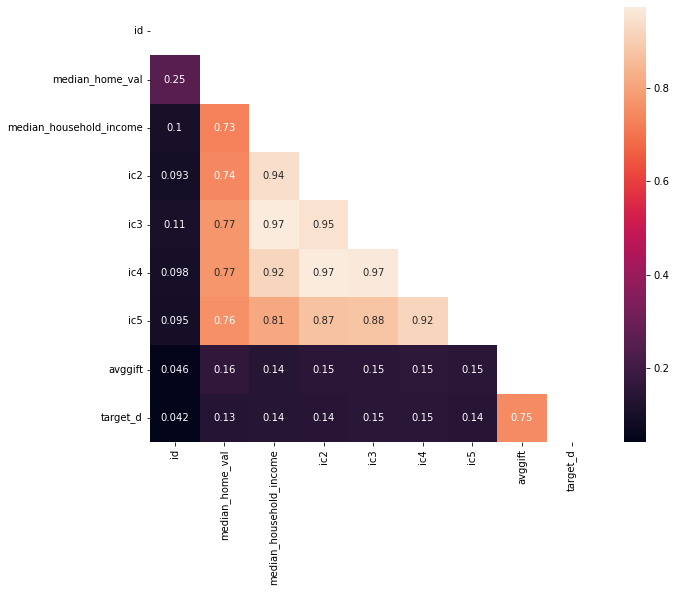

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [48]:
# Kendall
corr_matrix=data.corr(method='kendall')

In [49]:
corr_matrix

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
id,1.000000,0.160365,0.063943,0.058953,0.067876,0.062002,0.059639,0.030923,0.029435
median_home_val,0.160365,1.000000,0.543534,0.559531,0.585792,0.586977,0.579845,0.109716,0.094093
median_household_income,0.063943,0.543534,1.000000,0.822309,0.867539,0.774022,0.627421,0.094183,0.095680
ic2,0.058953,0.559531,0.822309,1.000000,0.825464,0.862544,0.699511,0.100307,0.098734
ic3,0.067876,0.585792,0.867539,0.825464,1.000000,0.862161,0.700565,0.101119,0.102236
ic4,0.062002,0.586977,0.774022,0.862544,0.862161,1.000000,0.764394,0.102485,0.101827
ic5,0.059639,0.579845,0.627421,0.699511,0.700565,0.764394,1.000000,0.098804,0.098784
avggift,0.030923,0.109716,0.094183,0.100307,0.101119,0.102485,0.098804,1.000000,0.595611
target_d,0.029435,0.094093,0.095680,0.098734,0.102236,0.101827,0.098784,0.595611,1.000000


In [50]:
mask = np.zeros_like(corr_matrix)

In [51]:
mask[np.triu_indices_from(mask)] = True

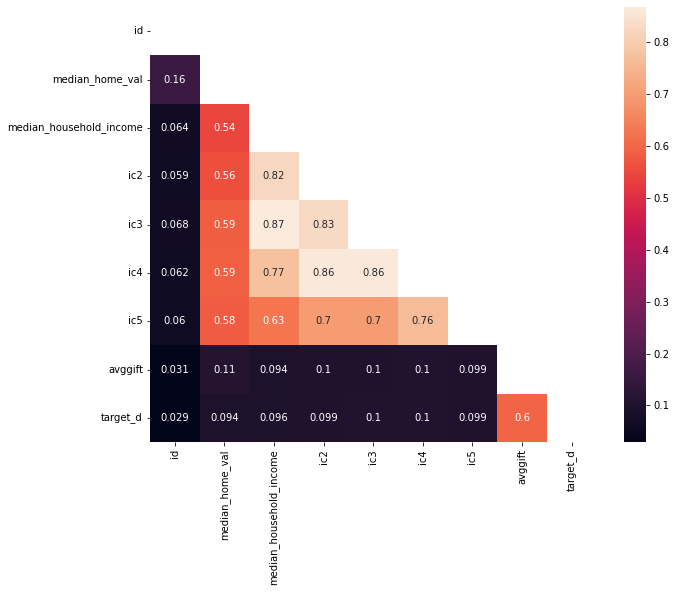

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()


### Lesson 4 key concepts

> :clock10: 20 min

- Correlation matrix
  - Properties of the matrix
  - Using `Seaborn` for visualizing correlation matrix
- Introduce multicollinearity (details later)

> :exclamation: Multicollinearity is used for feature selection. It has a deep impact in the model so it is important to learn this concept. We'll see this concept later on in the bootcamp.

- Chi-square test for independence of categorical variables (application in SciPy)
- Correlation between numerical and categorical vars (One way ANOVA - covered later)

In [53]:
corr_data = data.drop(['id','state', 'gender'], axis=1)

In [54]:
correlations_matrix = corr_data.corr()

In [55]:
correlations_matrix

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
median_home_val,1.000000,0.707209,0.743318,0.734526,0.748761,0.745223,0.138966,0.116805
median_household_income,0.707209,1.000000,0.951409,0.974777,0.928980,0.805221,0.120445,0.113246
ic2,0.743318,0.951409,1.000000,0.953585,0.971498,0.874783,0.136096,0.129964
ic3,0.734526,0.974777,0.953585,1.000000,0.971909,0.827514,0.125438,0.121965
ic4,0.748761,0.928980,0.971498,0.971909,1.000000,0.868411,0.132438,0.131260
ic5,0.745223,0.805221,0.874783,0.827514,0.868411,1.000000,0.141580,0.137878
avggift,0.138966,0.120445,0.136096,0.125438,0.132438,0.141580,1.000000,0.487595
target_d,0.116805,0.113246,0.129964,0.121965,0.131260,0.137878,0.487595,1.000000


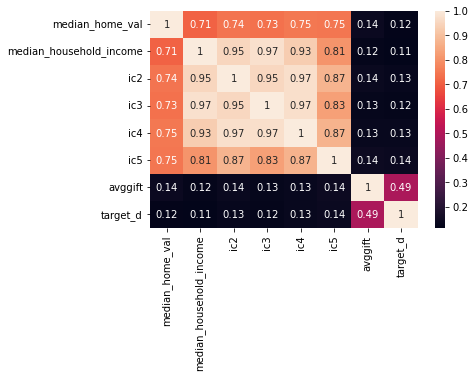

In [56]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [57]:
mask = np.zeros_like(correlations_matrix)

In [58]:
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now

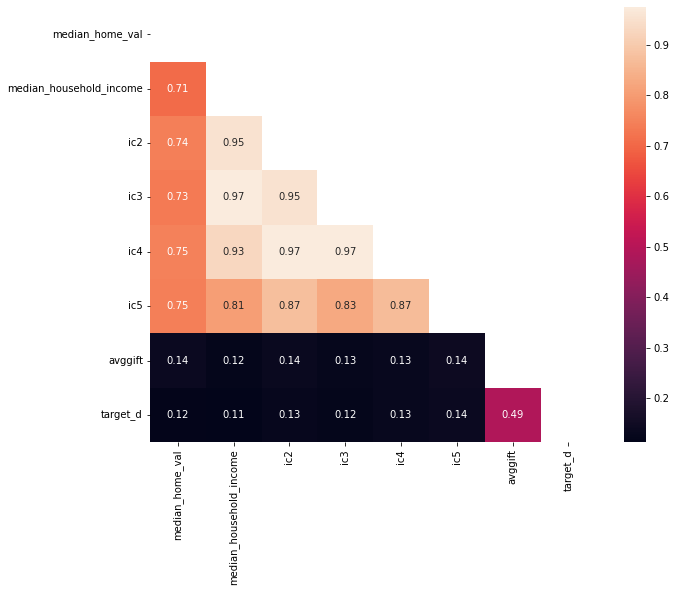

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [60]:
# Categorical variables - Chi square test for independence
crosstab = pd.crosstab(data['state'], data['gender'])  # note we need to clean column state before we use this crosstab

In [61]:
[statistic, p_value, dof, arr] = stats.chi2_contingency(crosstab)

In [62]:
print(p_value)

0.0


### Additional Reading

- [Correlation between numerical variables](https://realpython.com/numpy-scipy-pandas-correlation-python/)
- [Chi square test for independence of variables](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

### :pencil2: Practice on key concepts - Lab

> :clock10: 30 min

# Lab | Customer Analysis Round 3

For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.

### Get the data

- Use the same jupyter file from the last lab, `Customer Analysis Round 2`

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

### Additional Resources

- [Matplotlib - cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn - cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)